# Soccer Gridsearch Data

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

import chart_studio.plotly as py
import plotly.figure_factory as ff

%matplotlib inline

sns.set()

### Extract Data Function

In [104]:
# Get DataFrame from csv files for large simplePG dataset
def df_data(algo, epoch, batch_size, lr, nnsize):
    fname = algo + "-soccer-0_epochs" + str(epoch) + "_batch_size" + str(batch_size) + "_lr" + str(lr) + "_hidden_sizes" + nnsize + "_.csv"
    file_name = "C:/Users/drago/OneDrive - UW/Ratliff Research/soccergrid_data/"+ fname
    simple_data = pd.read_csv(file_name)
    return simple_data

In [108]:
# Get DataFrame from csv files for small dataset
def df_data(algo, epoch, batch_size, lr, nnsize):
    fname = algo + "-smallsoccer-0_epochs" + str(epoch) + "_batch_size" + str(batch_size) + "_lr" + str(lr) + "_hidden_sizes" + nnsize + "_.csv"
    file_name = "C:/Users/drago/OneDrive - UW/Ratliff Research/soccergrid_data/smallsoccer0-gridsearch/"+ fname
    simple_data = pd.read_csv(file_name)
    return simple_data

### Helper Functions

In [89]:
# Find mode when converging returns, and return x,y coord
def converge_find(data):
    y = Counter(data).most_common(1)[0][0]
    for i in np.arange(0,len(data)):
        ytest = data[i]
        if (y == ytest):
            x = i
            break
    return x,y

# Given what is graphed return an appropriate xlabel (for now only epoch?)
def get_xlabel():
    xlabel = 'Epochs'
    return xlabel

# Given what is graphed return an appropriate ylabel
def get_ylabel(y_df):
    columns = y_df.columns
    if ('avg_rets' in y_df.columns[0]):
        ylabel = 'Average Returns'
    elif ('loss' in y_df.columns[0]):
        ylabel = 'Loss'
    elif ('grad_norms' in y_df.columns[0]):
        ylabel = 'Gradient Norms'
    else:
        ylabel = 'Not Found'
    return ylabel

# Given what is graphed return an appropriate title
def get_title(y_df, algo, epoch, batch_size, lr, nnsize):
    title = algo + ' agent0 vs agent1 ' + get_ylabel(y_df) + ' (ep =' + str(epoch) + ' bs = ' + str(batch_size) + ' lr = ' + str(lr) + 'nnsize = ' + nnsize + ')'
    return title
    
# Given string list of gradient norms, return float list of grad_norms and RSS for grads         
def grad_norms_to_float(grad_array):
    grad_array = grad_array.strip('][').split(', ')
    for i in np.arange(0,len(grad_array)):
        grad_array[i] = float(grad_array[i])
    root_sum_square = np.sqrt(sum([i**2 for i in grad_array]))
    return grad_array, root_sum_square

### Plotting Function

In [78]:
# Given parameters plot graph
def data_plot(fig, ax, algo, epoch, batch_size, lr, nnsize, data,  title='ABC', conv_label=False, figsize=[9, 4]):
    simple_data = df_data(algo, epoch, batch_size, lr, nnsize)
    
    # Plot
    if ('returns' in data):
        data1 = 'agent0_avg_rets'
        data2 = 'agent1_avg_rets'
    elif ('loss' in data):
        data1 = 'agent0_loss'
        data2 = 'agent1_loss'
    y_df = simple_data[[data1, data2]]
    y = df.to_numpy(y_df)
    x = np.arange(0,len(y))
    fig.set_size_inches(figsize)
    ax.plot(x, y[:,0], color='r')
    ax.plot(x, y[:,1], color='b')
    
# Plot convergence location + label
    if (conv_label):
        x_mode1, y_mode1 = converge_find(y[:,0])
        x_mode2, y_mode2 = converge_find(y[:,1])
        if (x_mode1 !=0):
            ax.plot(x_mode1, y_mode1, 'go')
            ax.text(x_mode1 + 8, y_mode2 + 10, 'x = '+ str(x_mode1) + ' y = '
                     + str(round(y_mode1)), horizontalalignment='center',
                     backgroundcolor=(1,1,1,0.7))
        if (x_mode2 != 0):
            ax.plot(x_mode2, y_mode2, 'go')
            ax.text(x_mode2 + 5, y_mode2 - 7, 'x = '+ str(x_mode2) + ' y = '
                     + str(round(y_mode2)), horizontalalignment='center',
                     backgroundcolor=(1,1,1,0.7))

    ax.set_xlim([0, epoch])
    ax.set_xlabel(get_xlabel())
    ax.set_ylabel(get_ylabel(y_df))
    if ('ABC' not in title):
        ax.set_title(title)
    else:
        ax.set_title(get_title(y_df, algo, epoch, batch_size, lr, nnsize))
    ax.legend(['Agent 0', 'Agent 1'])
    return 0

### Extra Plotting Functions

In [106]:
# Plot all of one datatype onto one graph
def all_data_plot(algo, epochs, batch_sizes, lrs, nnsizes, studies, figsize=[9,4]):
    fig, ax = plt.subplots()
    for epoch in epochs:
        for batch in batch_sizes:
            for lr in lrs:
                for nnsize in nnsizes:
                    for study in studies:
                        data_plot(fig, ax, algo, epoch, batch, lr, nnsize, study, figsize=figsize)

# Given the arrays of possible epochs, batch_sizes, lr, studies, return a map of all data
def all_data_map_plot(algos, epochs, batchs_sizes, lrs, nnsizes, studies, figsize=[9,4]):
    fig, ax = plt.subplots(2, 2, figsize=figsize, constrained_layout=True) # 2 Algos, 2 Studies (Returns + Losses)
    algo_count = -1
    study_count = -1
    for algo in algos:
        algo_count +=1
        if (study_count == 1):
            study_count = -1
        for study in studies:
            study_count += 1
            for epoch in epochs:
                for batch in batch_sizes:
                    for lr in lrs:
                        for nnsize in nnsizes:
                            data_plot(fig, ax[algo_count,study_count], algo, epoch, batch, lr, nnsize, study, title= algo + ' ' + study, figsize=figsize)


### Graphs

0

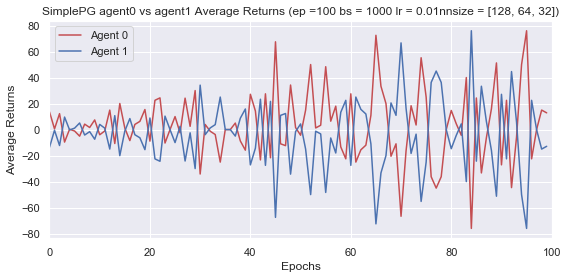

In [86]:
# Plot One
algo = 'SimplePG' # SimplePG or StackPG
epoch = 100 # 100
batch_size = 1000 # 1000, 5000
lr = 0.01 # 0.001, 0.01
data = 'returns' # returns or loss
nnsize = '[128, 64, 32]'
fig, ax = plt.subplots() # 2 Algos, 2 Studies (Returns + Losses)
data_plot(fig, ax, algo, epoch, batch_size, lr, nnsize, data)

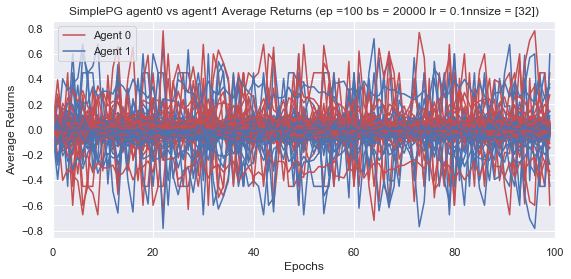

In [105]:
# Plot SimplePG
algo = 'SimplePG'
epochs = [100]
batch_sizes1 = [1000, 5000]
batch_sizes2 = [1000, 5000, 20000]
lrs1 = [0.001, 0.01]
lrs2 = [0.0001, 0.001, 0.01, 0.1]
nnsizes1 = ['[128, 64, 32]', '[64]', '[32]']
nnsizes2 = ['[128, 64, 32]', '[256, 128, 64]', '[128]', '[64]', '[32]']
studies = ['returns']
# all_data_plot(algo, epochs, batch_sizes1, lrs1, nnsizes1, studies)
# all_data_plot(algo, epochs, batch_sizes2, lrs2, nnsizes2, studies)

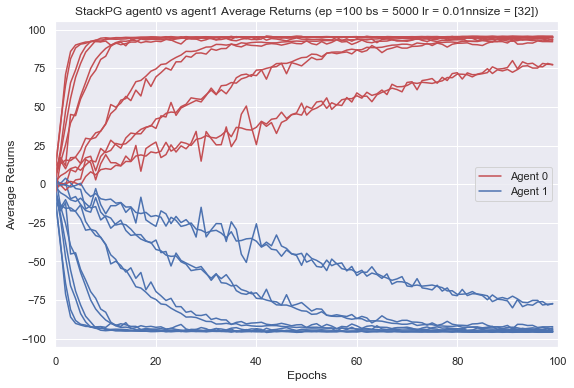

In [88]:
# Plot StackPG
algo = 'StackPG'
epochs = [100]
batch_sizes = [1000, 5000]
lrs = [0.001, 0.01]
nnsizes = ['[128, 64, 32]', '[64]', '[32]']
studies = ['returns']
all_data_plot(algo, epochs, batch_sizes, lrs, nnsizes, studies, figsize=[9,6])

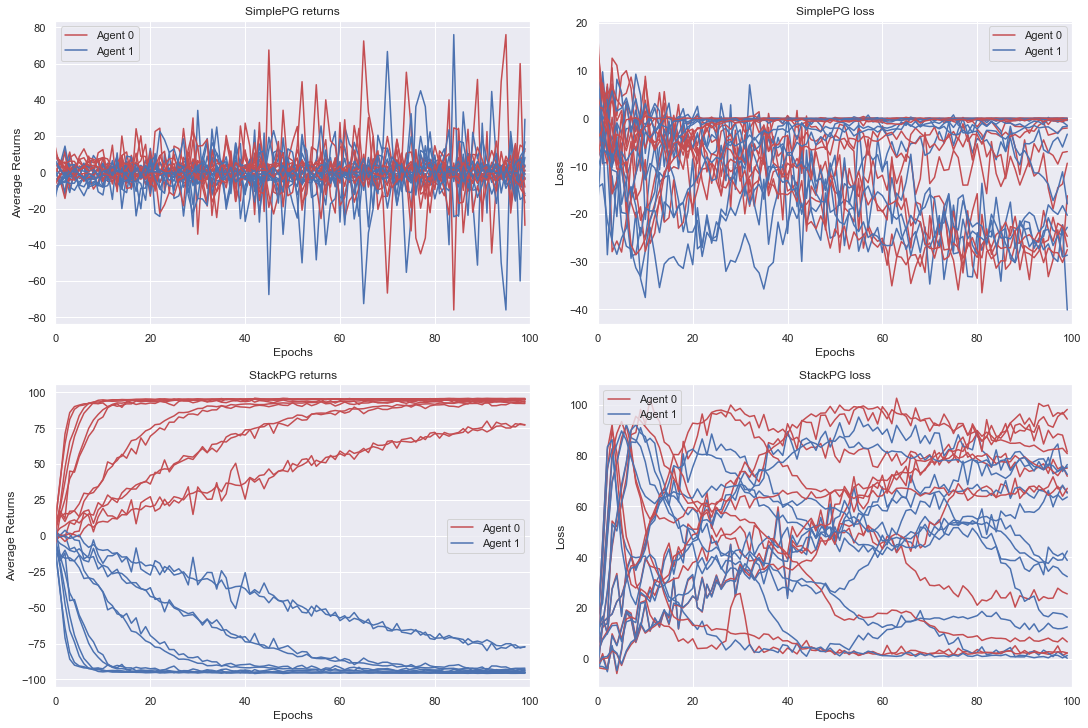

In [110]:
# Plot Map
algos = ['SimplePG', 'StackPG']
epochs = [100]
batch_sizes = [1000, 5000]
lrs = [0.001, 0.01]
nnsizes = ['[128, 64, 32]', '[64]', '[32]']
studies = ['returns', 'loss']
all_data_map_plot(algos, epochs, batch_sizes, lrs, nnsizes, studies, figsize=[15,10])

### Extract raw_df

In [39]:
# All Raw Data DF
def raw_score_df(algos, epochs, batch_sizes, lrs, nnsizes):
    raw_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'Learning Rate': [], 'Hidden Size': [], 'Epoch': [],
                 'agent0_grad_norms': [], 'agent0_gn_rss': [], 'agent0_avg_rets': [],
                 'agent0_avg_lens': [], 'agent0_loss': [], 'agent1_grad_norms': [], 'agent1_gn_rss': [],
                 'agent1_avg_rets': [], 'agent1_avg_lens': [], 'agent1_loss': []})
    for algo in algos:
        for epoch in epochs:
            for batch in batch_sizes:
                for lr in lrs:
                    for nnsize in nnsizes:
                        data = df_data(algo, epoch, batch, lr, nnsize)
                        for idx in np.arange(0,len(data.index)):
                            ag0_gn = data.at[idx,'agent0_grad_norms']
                            ag0_gn, ag0_gn_rss = grad_norms_to_float(ag0_gn)
                            ag0_ar = data.at[idx,'agent0_avg_rets']
                            ag0_al = data.at[idx,'agent0_avg_lens']
                            ag0_l = data.at[idx,'agent0_loss']
                            ag1_gn = data.at[idx,'agent1_grad_norms']
                            ag1_gn, ag1_gn_rss = grad_norms_to_float(ag1_gn)
                            ag1_ar = data.at[idx,'agent1_avg_rets']
                            ag1_al = data.at[idx,'agent1_avg_lens']
                            ag1_l = data.at[idx,'agent1_loss']
                            raw_df.loc[len(raw_df.index)] = [algo, epoch, batch, lr, nnsize, idx,
                                                             ag0_gn, ag0_gn_rss, ag0_ar, ag0_al, ag0_l,
                                                             ag1_gn, ag1_gn_rss, ag1_ar, ag1_al, ag1_l] 
    return raw_df


algos = ['SimplePG', 'StackPG']
epochs = [100]
batch_sizes = [1000, 5000]
lrs = [0.001, 0.01]
nnsizes = ['[128, 64, 32]', '[64]', '[32]']
raw_df = raw_score_df(algos, epochs, batch_sizes, lrs, nnsizes)

print(raw_df)
raw_df.to_pickle("C:/Users/drago/OneDrive - UW/Ratliff Research/soccergrid_data/smallsoccer0-gridsearch/raw_df.pkl")

          Algo  Epochs  Batch Size  Learning Rate    Hidden Size  Epoch  \
0     SimplePG   100.0      1000.0          0.001  [128, 64, 32]    0.0   
1     SimplePG   100.0      1000.0          0.001  [128, 64, 32]    1.0   
2     SimplePG   100.0      1000.0          0.001  [128, 64, 32]    2.0   
3     SimplePG   100.0      1000.0          0.001  [128, 64, 32]    3.0   
4     SimplePG   100.0      1000.0          0.001  [128, 64, 32]    4.0   
...        ...     ...         ...            ...            ...    ...   
2395   StackPG   100.0      5000.0          0.010           [32]   95.0   
2396   StackPG   100.0      5000.0          0.010           [32]   96.0   
2397   StackPG   100.0      5000.0          0.010           [32]   97.0   
2398   StackPG   100.0      5000.0          0.010           [32]   98.0   
2399   StackPG   100.0      5000.0          0.010           [32]   99.0   

                                      agent0_grad_norms  agent0_gn_rss  \
0     [1.6080373525619507